In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('data/Air_passengers/AirPassengers.csv')
print(data.shape)
data.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
#convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
import plotly.express as px

fig = px.line(data, x='Month', y='#Passengers', title='Air Passengers')
fig.show() 

## Time Series Forecasting with Prophet 

In [6]:
from prophet import Prophet

In [7]:
data.rename(columns={'Month': 'ds', '#Passengers': 'y'}, inplace=True)

data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
data['ds'].dt.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [9]:
valid_data = data[data['ds'].dt.year == 1960]
train_data = data[data['ds'].dt.year != 1960]

print(f'Train data shape: {train_data.shape}')
print(f'Validation data shape: {valid_data.shape}')

Train data shape: (132, 2)
Validation data shape: (12, 2)


In [10]:
model = Prophet()
model.fit(train_data)

19:09:28 - cmdstanpy - INFO - Chain [1] start processing
19:09:28 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
forecast = model.predict(valid_data)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,1960-08-01,527.210913,500.181971,551.694173
8,1960-09-01,486.018577,460.271707,511.575791
9,1960-10-01,452.356285,428.168088,478.476959
10,1960-11-01,422.541206,395.617982,448.083069
11,1960-12-01,447.807953,420.882102,475.844633


In [12]:
forecast.shape

(12, 16)

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(valid_data['y'], forecast['yhat'])

33.4464040044602

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly


In [15]:
plot_plotly(model, forecast)

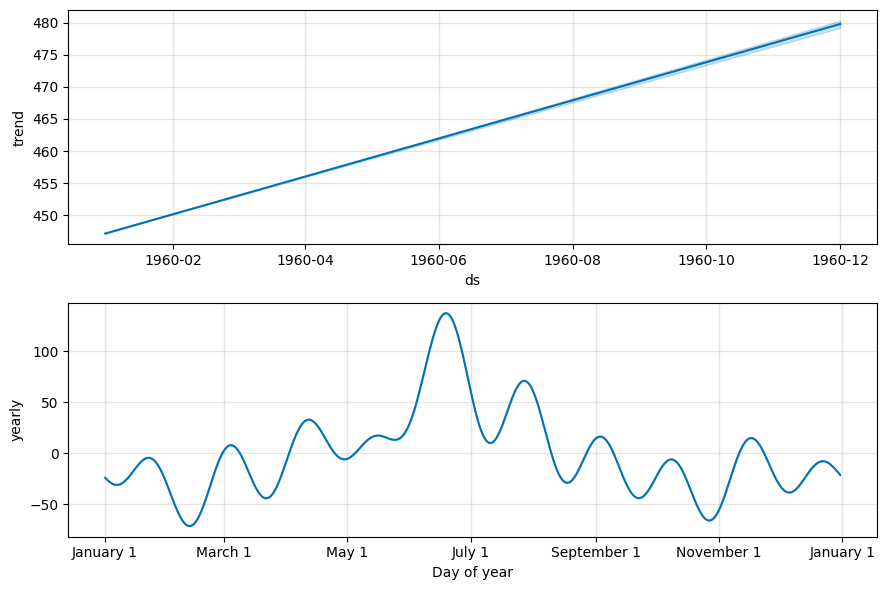

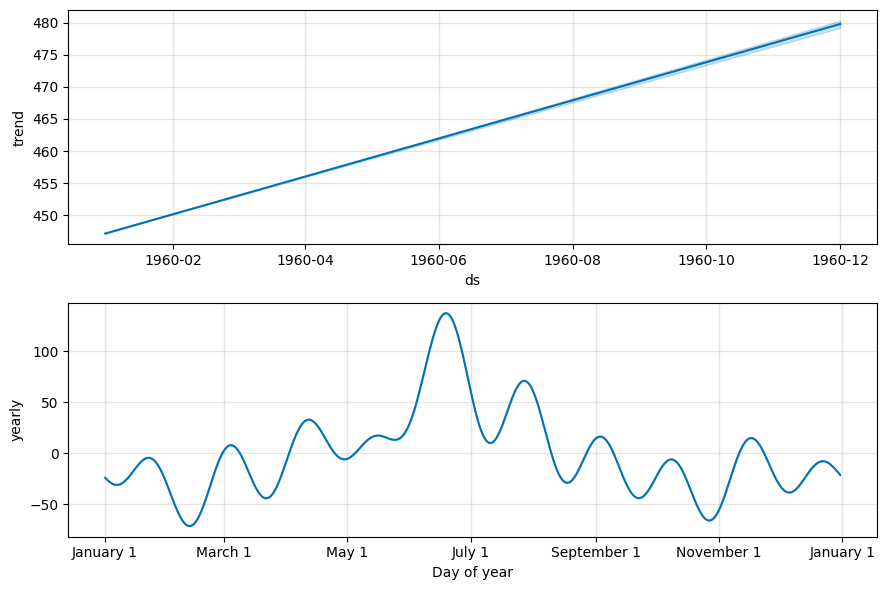

In [16]:
model.plot_components(forecast)

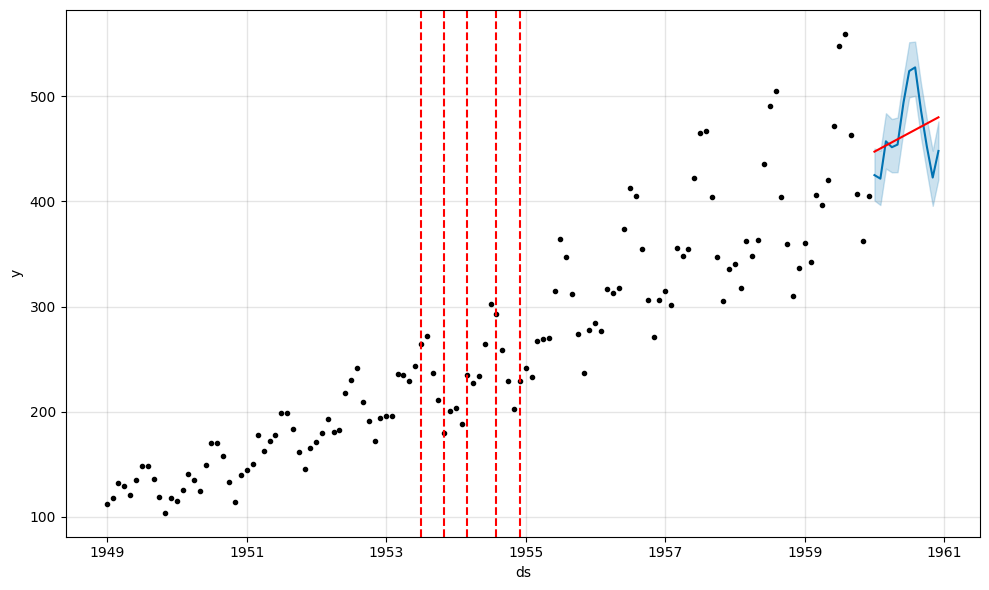

In [18]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [19]:
model.changepoints

4     1949-05-01
8     1949-09-01
12    1950-01-01
17    1950-06-01
21    1950-10-01
25    1951-02-01
29    1951-06-01
33    1951-10-01
37    1952-02-01
42    1952-07-01
46    1952-11-01
50    1953-03-01
54    1953-07-01
58    1953-11-01
62    1954-03-01
67    1954-08-01
71    1954-12-01
75    1955-04-01
79    1955-08-01
83    1955-12-01
87    1956-04-01
92    1956-09-01
96    1957-01-01
100   1957-05-01
104   1957-09-01
Name: ds, dtype: datetime64[ns]

In [ ]:
train_df = train_data.copy()
valid_df = valid_data.copy()

In [ ]:
valid_df.set_index('ds', inplace=True)
train_df.set_index('ds', inplace=True)

In [ ]:
train_df.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def forecast_plot(df1, df2, pred, names, model_name):
    fig = make_subplots(
        rows=1, cols=1, vertical_spacing=0.05
    )

    fig.add_trace(
        go.Scatter(
            name=names[0],
            x=df1.index,
            y=df1["y"],
            marker=dict(size=10, color="blue"),
            textfont=dict(color="black", size=18, family="Times New Roman"),
        )
    )

    fig.add_trace(
        go.Scatter(
            name=names[1], x=df2.index, y=df2["y"], marker=dict(size=10, color="red")
        )
    )

    fig.add_trace(
        go.Scatter(
            name=names[2], x=df2.index, y=pred, marker=dict(size=10, color="green")
        )
    )

    fig.update_xaxes(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        )
    )
    fig.update_layout(
        title={
            "text": f"{model_name} Model Plot",
            "y": 0.98,
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top",
            "font": {"size": 15},
        }
    )
    fig.update_layout(
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    names = set()
    fig.for_each_trace(
        lambda trace: trace.update(showlegend=False)
        if (trace.name in names)
        else names.add(trace.name)
    )

    fig.show()


In [ ]:
forecast_plot(train_df, valid_df, forecast['yhat'], ['Train', 'Valid', 'Predict'], 'Prophet') 